# Question 1
* cost function to be implemented: gini index

**subtask_1**
: Perform pre-processing and visualization of the dataset. Perform categorical encoding
wherever applicable and split the data into train and test sets

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score

penguin=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/penguins.csv')
print(penguin)
print(penguin.info())

       species     island  bill_length_mm  ...  body_mass_g     sex  year
0       Adelie  Torgersen            39.1  ...       3750.0    male  2007
1       Adelie  Torgersen            39.5  ...       3800.0  female  2007
2       Adelie  Torgersen            40.3  ...       3250.0  female  2007
3       Adelie  Torgersen             NaN  ...          NaN     NaN  2007
4       Adelie  Torgersen            36.7  ...       3450.0  female  2007
..         ...        ...             ...  ...          ...     ...   ...
339  Chinstrap      Dream            55.8  ...       4000.0    male  2009
340  Chinstrap      Dream            43.5  ...       3400.0  female  2009
341  Chinstrap      Dream            49.6  ...       3775.0    male  2009
342  Chinstrap      Dream            50.8  ...       4100.0    male  2009
343  Chinstrap      Dream            50.2  ...       3775.0  female  2009

[344 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (to

In [312]:
'''bill lengthm bill depth, flipper length body mass and sex of few penguins missing--------------------- one'''
penguin.dropna(inplace=True)
print(penguin.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB
None


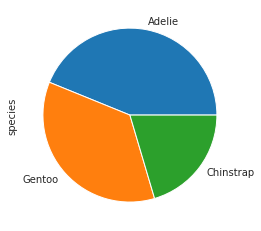

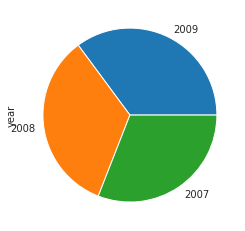

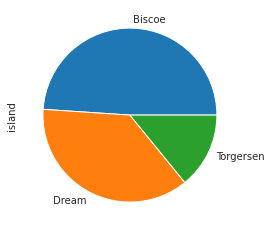

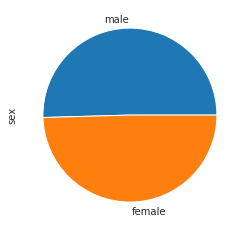

In [313]:

for i in ['species', 'year', 'island', 'sex']:
  fig,ax=plt.subplots() 
  penguin[i].value_counts().plot(ax=ax,kind='pie')
  plt.show()

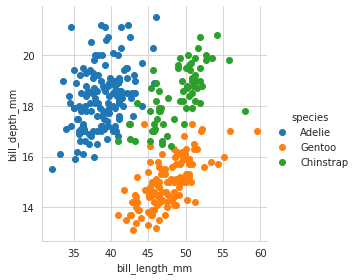

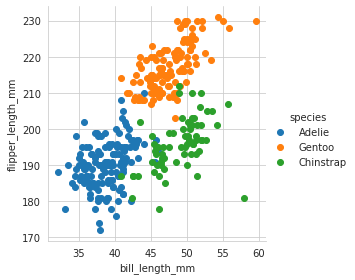

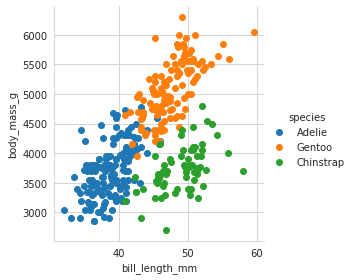

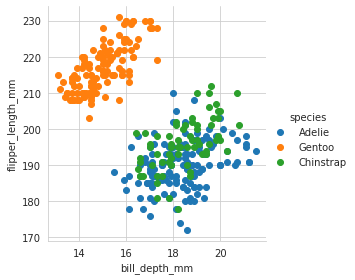

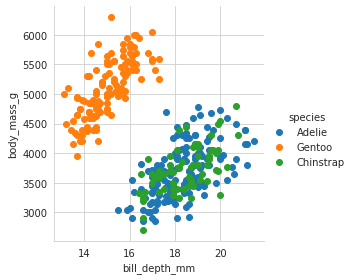

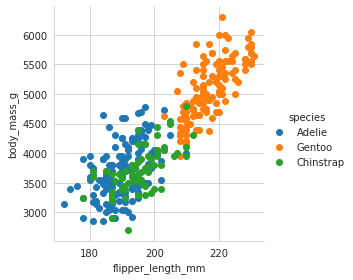

In [314]:

import seaborn as sns

sns.set_style("whitegrid")
 
features= ['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g' ]

for i in range(4):
  for j in range(i+1, 4):
    sns.FacetGrid(penguin, hue ="species",
              height = 4).map(plt.scatter,
                              features[i], features[j]).add_legend()


In [315]:
## year, island and species are categorical 

print(penguin['species'].value_counts())
print(penguin['island'].value_counts())
print(penguin['year'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64
Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64
2009    117
2008    113
2007    103
Name: year, dtype: int64


we have 3 species which being our target need to be categorically encoded
 further, 3 islands, 3 different year and 2 sexes;
 and need to be encoded accordingly;

 Sex, Year and Island should be more aptly 1-hot encoded



In [316]:

##ordinal encoder for our target: species
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()



from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
penguin_sex_1hot = cat_encoder.fit_transform(penguin[['sex']])
penguin_island_1hot=cat_encoder.fit_transform(penguin[[ 'island']])
penguin_year_1hot=cat_encoder.fit_transform(penguin[['year']])

print(penguin['sex'][190], penguin['island'][190],  penguin_sex_1hot[190], penguin_island_1hot[190])
print(penguin['sex'][331], penguin['island'][331],  penguin_sex_1hot[331], penguin_island_1hot[331])
print(penguin['sex'][300], penguin['island'][300],  penguin_sex_1hot[300], penguin_island_1hot[300])
print(penguin['year'][300], penguin_year_1hot[300])
print(penguin['year'][200], penguin_year_1hot[200])
print(penguin['year'][100], penguin_year_1hot[100])

female Biscoe [1. 0.] [1. 0. 0.]
male Dream [0. 1.] [0. 1. 0.]
female Dream [1. 0.] [0. 1. 0.]
2007 [0. 1. 0.]
2008 [0. 1. 0.]
2009 [0. 0. 1.]


From our previous task;

Values of penguin_sex_1hot has following meaning:
* columns 0- female
* column 1- male

Value of penguin_island_1hot has following meaning:
* column 0- Biscoe
* column 1- Dream
* column 2- Torgersen

Value of penguin_year_1hot has following meaning:
* columns 0- 2007
* column 1- 2008
* column 2- 2009

In [317]:
'''in our one-hot encoded matrix:
  Columns represent: Adelie, Chinstrap, Gentoo, Biscoe, Dream, Torgensen'''


X=penguin.copy().drop('species', axis=1)
y=penguin['species'].copy()

X.drop(columns=['sex', 'island', 'year'], inplace=True)
place=['Biscoe','Dream','Torgensen']
for i in range(3):
  X[place[i]]= penguin_island_1hot[:, i]
  X[str(2007+i)]=penguin_year_1hot[:, i]


X['female']=penguin_sex_1hot[:, 0]
X['male']=penguin_sex_1hot[:, 1]


print(X.head())
print(X.info())

   bill_length_mm  bill_depth_mm  flipper_length_mm  ...  2009  female  male
0            39.1           18.7              181.0  ...   0.0     0.0   1.0
1            39.5           17.4              186.0  ...   0.0     1.0   0.0
2            40.3           18.0              195.0  ...   0.0     1.0   0.0
4            36.7           19.3              193.0  ...   0.0     1.0   0.0
5            39.3           20.6              190.0  ...   0.0     0.0   1.0

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   Biscoe             333 non-null    float64
 5   2007               333 non-null    float64
 6   Dream              33

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=42)

In [319]:
'''implementing gini index'''

def gini_index(data):
  classes= np.unique(data)
  gini=1

  for c_i in classes:
    p= len( data[data==c_i])/len(data)
    gini-=p**2
  return gini


In [320]:
def con_to_cat(data):
  sample_count=data.shape[0]
  feature_count=data.shape[1]

  max_gini=-999999999999
  split={}

  for feature in range(feature_count):
    values=data[:, feature]
    values=np.unique(values)
    for threshold in values:
      data_left=np.array( [row for row in data if row[feature]<= threshold])
      data_right=np.array( [row for row in data if row[feature]> threshold])

      if( len(data_left)>0 and len(data_right)>0):
        y, left_y, right_y= data[:,-1], data_left[:, -1], data_right[:, -1]

        wl=len(left_y)/len(y)
        wr=len(right_y)/len(y)
        gini= gini_index(y)- wl*gini_index(left_y) - wr*gini_index(right_y)
        if gini> max_gini and feature!=12: ######second condition added idky<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
          max_gini= gini
          split['gini']=max_gini
          split['threshold']= threshold
          split['left']= data_left
          split['right']=data_right
          split['feature']=feature
          #print(feature)
  
  return split

In [321]:
'''
con_to_cat() automatically selects the attribute which leads to the best split and performs the split
therefore 4 a. b. done'''

class Node():
  def __init__(self, gini=None , threshold=None , left=None , right=None, feature=None ,value=None):
    self.gini=gini
    self.threshold=threshold
    self.left=left
    self.right=right
    self.feature=feature
    self.value=value



class DTC():
  def __init__(self, min_samples_split=2, max_depth=2):
    self.min_samples_split= min_samples_split
    self.max_depth=max_depth
    self.root= None

  ''' referrenced from https://github.com/Suji04/ML_from_Scratch/blob/master/decision%20tree%20classification.ipynb'''
  def tree(self,data , curr_depth=0):
    X, y= data[:, :-1], data[:, -1]

    sample_count, feature_count= X.shape
    if curr_depth<=self.max_depth :
      if  sample_count> self.min_samples_split:
        split= con_to_cat(data)
        if split['gini']>0:
          left_tree= self.tree( split['left'], curr_depth+1)
          right_tree= self.tree( split['right'], curr_depth+1)
          return Node( split['gini'], split['threshold'], left_tree, right_tree, split['feature'])

    #pred_value = Counter(y)

    count=0
    y_=list(y)
    pred_value= y_[0]
    for i in y_:
      curr_freq= y_.count(i)
      if curr_freq>count:
        count=curr_freq
        pred_value=i
    #return Node( value= pred_value.most_common(1)[0][0])
    return Node( value= pred_value) #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

  def fit(self, X, y):
    data= np.concatenate( (X,y[:, None]), axis=1)
    self.root= self.tree(data)

  def predict(self, X):
    predictions=[]
    for i in X:
      pred= self.make_prediction(i, self.root)
      predictions.append(pred)
    return predictions


  def make_prediction(self, x, tree):
    if tree.value!=None:
     return tree.value
    
    feature = x[tree.feature] 
    if feature<tree.threshold:
      return self.make_prediction(x, tree.left)
    else:
      return self.make_prediction(x, tree.right)

In [322]:
dtc= DTC(min_samples_split=2, max_depth=7)
dtc.fit( X_train, y_train)

X_test=np.array(X_test)
y_pred= dtc.predict(X_test)
print( accuracy_score( y_pred, y_test))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.9552238805970149


In [323]:


X_test_adelie, y_adelie= X_test[y_test=="Adelie"], y_test[y_test=="Adelie"]
X_test_gentoo, y_gentoo= X_test[y_test=="Gentoo"], y_test[y_test=="Gentoo"]
X_test_chinstrap, y_chinstrap= X_test[y_test=="Chinstrap"], y_test[y_test=="Chinstrap"]

y_pred_adelie= dtc.predict(X_test_adelie)
y_pred_gentoo= dtc.predict(X_test_gentoo)
y_pred_chinstrap= dtc.predict(X_test_chinstrap)

print('Adelie accuracy :', accuracy_score( y_pred_adelie, y_adelie))
print('gentoo accuracy :', accuracy_score( y_pred_gentoo, y_gentoo))
print('chinstrap accuracy :', accuracy_score( y_pred_chinstrap, y_chinstrap))



Adelie accuracy : 1.0
gentoo accuracy : 0.8888888888888888
chinstrap accuracy : 0.9444444444444444


# QUESTION 2


In [324]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/ENB2012_data.csv')
print(data.head())
print(data.info())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB
None


In [325]:
view= data.copy()
corr_matrix=view.corr()
print( corr_matrix['Y1'].sort_values(ascending=False))

Y1    1.000000
X5    0.889431
X1    0.622272
X3    0.455671
X7    0.269841
X8    0.087368
X6   -0.002587
X2   -0.658120
X4   -0.861828
Name: Y1, dtype: float64


X6 is the only categorical data while rest are numerical


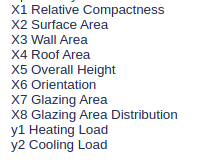

In [326]:
'''we can clearly see, heavy corelation of Y1 with X5, X1, X4
> furthermore, on exploring the dataset, X6 is found to be a categorical label(orientation)'''
#one-hot encoding X6

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
X6_one_hot = cat_encoder.fit_transform(data[['X6']])
X6_one_hot



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [327]:
data['orientation_1']=X6_one_hot[:, 0]
data['orientation_2']=X6_one_hot[:, 1]
data['orientation_3']=X6_one_hot[:, 2]
data['orientation_4']=X6_one_hot[:, 3]
data.drop('X6', axis=1)

,X1,X2,X3,X4,X5,X7,X8,Y1,orientation_1,orientation_2,orientation_3,orientation_4
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,1.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,0.0,1.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,0.0,0.0,1.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,0.0,0.0,0.0,1.0
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,0.0,0.0,0.0,1.0
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,1.0,0.0,0.0,0.0
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,0.0,1.0,0.0,0.0
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,0.0,0.0,1.0,0.0


In [328]:
X= data.drop('Y1', axis=1)
y= data['Y1'].copy()

'''we have no missing values'''
X_train_set, X_test_set = train_test_split(X, test_size=0.2, random_state=42)
y_train_set, y_test_set = train_test_split(y, test_size=0.2, random_state=42)

X_train_set, X_val_set= train_test_split(X_train_set, test_size=0.125, random_state=42)
y_train_set, y_val_set= train_test_split(y_train_set, test_size=0.125, random_state=42)

'''data preprocessing complete'''

'data preprocessing complete'

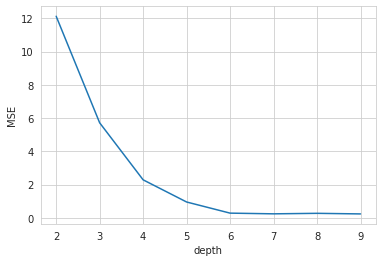

In [329]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

depths=[]
sample_splits=[]
sample_leaves=[]
mses=[]

'''variation of MSE with max_depth'''
for depth in range(2,10):
  tree=DecisionTreeRegressor(max_depth=depth)
  tree.fit(X_train_set, y_train_set)
  y_pred=tree.predict(X_val_set)
  mse=mean_squared_error(y_pred, y_val_set)  
  depths.append(depth)
  mses.append(mse)

plt.plot(depths, mses)
plt.xlabel('depth')
plt.ylabel('MSE')
plt.show()
mses=[]


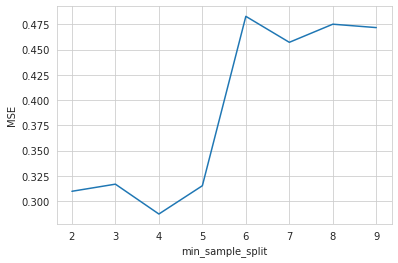

In [330]:

'''variation of MSE with min_sample_split'''
for sample_split in range(2,10):
  tree=DecisionTreeRegressor(min_samples_split= sample_split)
  tree.fit(X_train_set, y_train_set)
  y_pred=tree.predict(X_val_set)
  mse=mean_squared_error(y_pred, y_val_set)  
  sample_splits.append(sample_split)
  mses.append(mse)

plt.plot(sample_splits, mses)
plt.xlabel('min_sample_split')
plt.ylabel('MSE')
plt.show()
mses=[]



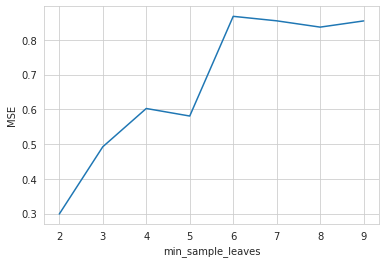

In [331]:
'''variation of min_sample_leaf with MSE'''
for sample_leaf in range(2,10):
  tree=DecisionTreeRegressor(min_samples_leaf= sample_leaf)
  tree.fit(X_train_set, y_train_set)
  y_pred=tree.predict(X_val_set)
  mse=mean_squared_error(y_pred, y_val_set)  
  sample_leaves.append(sample_leaf)
  mses.append(mse)

plt.plot(sample_leaves, mses)
plt.xlabel('min_sample_leaves')
plt.ylabel('MSE')
plt.show()
mses=[]

In [332]:

best_mse=9999999
best={}

def best_params(X_train, y_train, X_val, y_val, best_mse):
  for depth in range(2,30):
    for sample_split in range(2,12):
      for sample_leaf in range(1,10):
        tree_reg=DecisionTreeRegressor(max_depth= depth, min_samples_split= sample_split, min_samples_leaf=sample_leaf )
        tree_reg.fit(X_train, y_train)
        y_pred=tree_reg.predict(X_val)
        mse=mean_squared_error(y_pred, y_val)
        if mse<best_mse:
          best_mse=mse
          best['depth']= depth
          best['sample_split']= sample_split
          best['sample_leaf']=sample_leaf

best_params(X_train_set, y_train_set, X_val_set, y_val_set, best_mse)
print(best)

{'depth': 8, 'sample_split': 4, 'sample_leaf': 1}


In [333]:
'''lets train our model with the best parameters we got'''
from sklearn.model_selection import cross_val_score

best_tree= DecisionTreeRegressor(max_depth=best['depth'], min_samples_split=best['sample_split'], min_samples_leaf=best['sample_leaf'])
cross_val_score(best_tree, X_train_set, y_train_set, cv=5)

array([0.99666712, 0.99689939, 0.99708436, 0.99424786, 0.99503488])

In [334]:
'''our validation scores are not only high, but also consistent'''

best_tree.fit(X_train_set, y_train_set)
y_pred=best_tree.predict(X_test_set)
print(mean_squared_error(y_pred, y_test_set))

0.35178655116092544


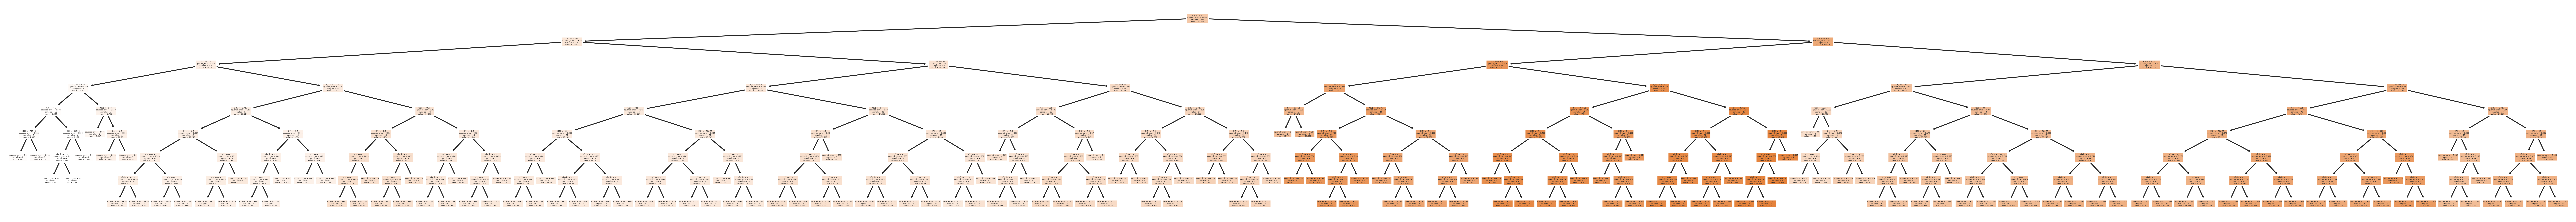

In [335]:

from sklearn import tree

fig, axes = plt.subplots(figsize=(48,4), dpi=500)
tree.plot_tree(best_tree,
               feature_names = list(data.columns.values).remove('Y1'), 
               filled = True);
fig.savefig('best_tree.png')